In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/creditcard.csv', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,6,13,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
97181,46047,-2.885416,-2.647887,1.903441,3.726885,3.800798,-1.64448,-1.924198,0.707696,-1.070468,...,0.284893,-0.268122,0.977417,0.136853,-1.144367,-0.535616,0.098494,0.305740,19.02,0.0
97182,46048,1.061410,0.04583,0.970401,1.102883,-0.490685,0.219968,-0.424285,0.235960,0.016498,...,0.033158,0.067127,0.053801,-0.010221,0.209877,-0.484136,0.057583,0.028018,28.70,0.0
97183,46048,-0.202740,0.295074,1.924698,1.009344,-0.235931,-0.272232,0.261015,-0.162146,-0.583849,...,0.321731,1.056540,0.093902,0.608566,-0.931546,0.466156,0.016695,-0.024568,54.81,0.0
97184,46048,-0.730116,0.79682,2.122484,-1.318082,0.019762,-0.857857,0.975752,-0.399896,0.359189,...,-0.149736,0.093479,-0.056586,0.650087,-0.473889,0.662115,0.060486,-0.208536,4.53,0.0
97185,46050,0.791672,-0.522991,0.036747,1.204803,-0.262390,-0.056153,0.263614,-0.130209,0.125423,...,0.013131,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Time       0
V1         0
V2         0
V3         1
V4         1
V5         2
V6         2
V7         4
V8         4
V9         4
V10        4
V11        5
V12        5
V13        6
V14        6
V15        9
V16       10
V17       10
V18       10
V19       10
V20       12
V21       13
V22       13
V23       15
V24       16
V25       18
V26       20
V27       23
V28       23
Amount    24
Class     27
dtype: int64

In [ ]:
df['Class'].value_counts()

0.0    96861
1.0      298
Name: Class, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

0.0    96861
1.0      298
Name: Class, dtype: int64


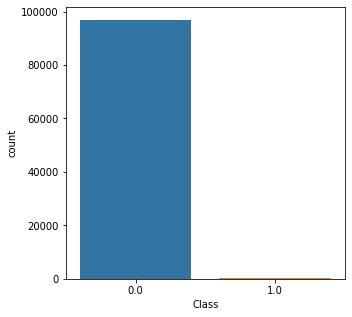

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Class',data=df);
print(pd.Series(df.Class).value_counts())
plt.show()

In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(96861, 31)
(298, 31)


In [ ]:
legit.Amount.describe()

count    96861.000000
mean        95.492289
std        256.026935
min          0.000000
25%          7.950000
50%         26.270000
75%         88.000000
max      12910.930000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     298.000000
mean       97.287181
std       230.882077
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

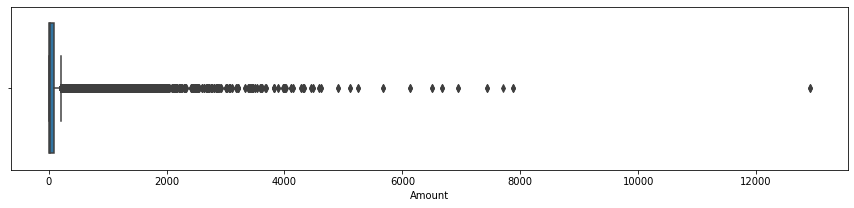

In [ ]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df)
plt.show()


In [ ]:
# checking outlier values 
q1_amount = df.Amount.quantile(.25)
q3_amount = df.Amount.quantile(.75)
IQR_amount = q3_amount - q1_amount
print('IQR: ', IQR_amount)
# defining limits                                       
sup_amount = q3_amount + 1.5 * IQR_amount
inf_amount = q1_amount - 1.5 * IQR_amount
print('Upper limit: ', sup_amount)
print('Lower limit: ', inf_amount)


IQR:  80.17
Upper limit:  208.375
Lower limit:  -112.30499999999999


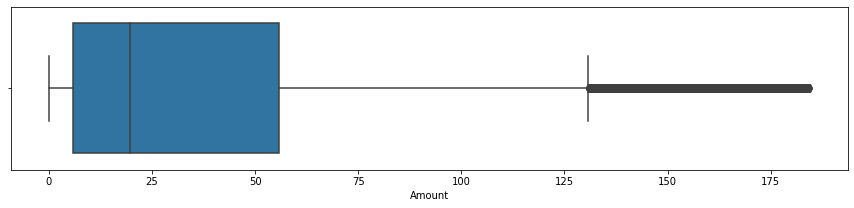

In [ ]:
# cleaning the outliers in `Amount` values
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.Amount>184.49].index, axis=0, inplace=True)
# new boxplot for `Amount` values
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(x='Amount', data=df_clean)
plt.show()

In [ ]:
legit.Amount.describe()

count    96861.000000
mean        95.492289
std        256.026935
min          0.000000
25%          7.950000
50%         26.270000
75%         88.000000
max      12910.930000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     298.000000
mean       97.287181
std       230.882077
min         0.000000
25%         1.000000
50%         8.370000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
df.groupby('Class').mean()

,Time,V1,V3,V4,V5,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,31081.992019,-0.218786,0.716998,0.169703,-0.256717,-0.103899,0.047747,0.101768,-0.028070,0.339566,...,0.045581,-0.030695,-0.103122,-0.039046,0.006930,0.138010,0.023829,0.001235,0.004063,95.492289
1.0,27435.355705,-7.620780,-10.347000,5.895653,-5.660222,-8.040300,3.711398,-3.563839,-7.514916,5.417858,...,0.461521,0.894955,-0.222253,-0.287479,-0.085162,0.245505,0.148887,0.600466,0.030571,97.287181


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_df= pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55440,35567,1.064475,-0.224727941934629,0.625183,0.777597,-0.694610,-0.320150443658352,-0.172651,0.064075,0.344814,...,-0.217110,-0.654331,0.018018,0.334507,0.267157,0.159035,-0.033746,0.016082,66.11,0.0
66125,37647,1.061864,-0.22496,0.482670,0.701586,-0.476169,-0.099781,-0.112818,0.041995,0.254955,...,-0.222266,-0.663971,-0.043368,0.036284,0.331518,0.175077,-0.032107,0.016824,79.95,0.0
28023,25098,-0.336131,0.657946,2.977536,2.681183,-0.031984,1.225932,-0.277693,0.210910,1.131376,...,-0.141406,0.299832,-0.139253,-0.039415,-0.627553,-0.042968,0.032014,-0.056788,1.52,0.0
34777,32458,1.348751,-0.773204268820913,1.218122,-0.431681,-1.633691,-0.413910924642777,-1.150647,0.034451,0.008753,...,0.118096,0.456634,-0.014052,0.413491,0.362710,-0.196209,0.054397,0.027236,9.08,0.0
28556,25854,-0.999172,-0.286049,2.074735,-2.526754,-1.201500,-0.265783,-0.440389,0.053244,-1.944310,...,-0.034928,0.335987,-0.296998,0.048524,0.299180,-0.160432,0.109142,0.109512,51.00,0.0


In [ ]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
93398,43369,-3.365319,2.426503,-3.752227,0.276017,-2.305870,-1.961578,-3.029283,-1.674462,0.183961,...,2.070008,-0.512626,-0.248502,0.126550,0.104166,-1.055997,-1.200165,-1.012066,88.00,1.0
93690,43494,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90,1.0
96081,45463,-1.476893,2.122314,-1.229470,1.201849,-0.343264,-1.317704,-1.528142,-0.620953,-1.213040,...,1.186036,-0.040215,-0.238930,0.110144,0.045418,-0.569232,0.481019,-0.047555,1.00,1.0
96136,45501,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,...,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,105.99,1.0
96199,45541,-1.519244,2.308492,-1.503599,2.064101,-1.000845,-1.016897,-2.059731,-0.275166,-1.562206,...,1.307871,0.102826,-0.017746,0.149696,-0.096602,-0.369115,-0.019244,-0.208319,1.00,1.0


In [ ]:
new_df['Class'].value_counts()

0.0    492
1.0    298
Name: Class, dtype: int64

In [ ]:
new_df.groupby('Class').mean()

,Time,V1,V3,V4,V5,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,30877.191057,-0.143655,0.802582,0.236600,-0.284076,-0.180099,-0.010793,0.136075,-0.097132,0.333805,...,0.052466,-0.019530,-0.072876,-0.061258,-0.019807,0.171291,0.020219,0.010375,0.007575,84.752276
1.0,27435.355705,-7.620780,-10.347000,5.895653,-5.660222,-8.040300,3.711398,-3.563839,-7.514916,5.417858,...,0.461521,0.894955,-0.222253,-0.287479,-0.085162,0.245505,0.148887,0.600466,0.030571,97.287181


In [ ]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [ ]:
print(X)

        Time        V1                  V2        V3        V4        V5  \
55440  35567  1.064475  -0.224727941934629  0.625183  0.777597 -0.694610   
66125  37647  1.061864            -0.22496  0.482670  0.701586 -0.476169   
28023  25098 -0.336131            0.657946  2.977536  2.681183 -0.031984   
34777  32458  1.348751  -0.773204268820913  1.218122 -0.431681 -1.633691   
28556  25854 -0.999172           -0.286049  2.074735 -2.526754 -1.201500   
...      ...       ...                 ...       ...       ...       ...   
93398  43369 -3.365319            2.426503 -3.752227  0.276017 -2.305870   
93690  43494 -1.278138            0.716242 -1.143279  0.217805 -1.293890   
96081  45463 -1.476893            2.122314 -1.229470  1.201849 -0.343264   
96136  45501  1.001992            0.047938 -0.349002  1.493958  0.186939   
96199  45541 -1.519244            2.308492 -1.503599  2.064101 -1.000845   

                       V6        V7        V8        V9  ...       V20  \
55440  -0.320

In [ ]:
print(Y)

55440    0.0
66125    0.0
28023    0.0
34777    0.0
28556    0.0
        ... 
93398    1.0
93690    1.0
96081    1.0
96136    1.0
96199    1.0
Name: Class, Length: 790, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(790, 30) (632, 30) (158, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9651898734177216


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9620253164556962
